In [1]:
import torch
import torch.nn as nn

from mle.configuration_mle import MLEConfig
from mle.modeling_mle import MLEForAnimeLineExtraction

In [2]:
config = MLEConfig()

In [3]:
model = MLEForAnimeLineExtraction(config)

In [4]:
model

MLEForAnimeLineExtraction(
  (model): MLEModel(
    (encoder): MLEEncoder(
      (layers): ModuleList(
        (0): MLEEncoderLayer(
          (blocks): ModuleList(
            (0): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(1, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (resize): Conv2d(1, 24, kernel_size=(1, 1), stride=(1, 1))
            )
            (1): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001

## Load original model


In [5]:
original = torch.load("./models/erika.pth")

In [6]:
list(original.keys())

['block0.model.0.conv1.model.0.weight',
 'block0.model.0.conv1.model.0.bias',
 'block0.model.0.conv1.model.0.running_mean',
 'block0.model.0.conv1.model.0.running_var',
 'block0.model.0.conv1.model.0.num_batches_tracked',
 'block0.model.0.conv1.model.2.weight',
 'block0.model.0.conv1.model.2.bias',
 'block0.model.0.residual.model.0.weight',
 'block0.model.0.residual.model.0.bias',
 'block0.model.0.residual.model.0.running_mean',
 'block0.model.0.residual.model.0.running_var',
 'block0.model.0.residual.model.0.num_batches_tracked',
 'block0.model.0.residual.model.2.weight',
 'block0.model.0.residual.model.2.bias',
 'block0.model.0.shortcut.model.0.weight',
 'block0.model.0.shortcut.model.0.bias',
 'block0.model.1.conv1.model.0.weight',
 'block0.model.1.conv1.model.0.bias',
 'block0.model.1.conv1.model.0.running_mean',
 'block0.model.1.conv1.model.0.running_var',
 'block0.model.1.conv1.model.0.num_batches_tracked',
 'block0.model.1.conv1.model.2.weight',
 'block0.model.1.conv1.model.2.bi

## Encoder


In [7]:
model.model.encoder

MLEEncoder(
  (layers): ModuleList(
    (0): MLEEncoderLayer(
      (blocks): ModuleList(
        (0): MLEResBlock(
          (norm1): MLEBatchNorm(
            (norm): BatchNorm2d(1, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act_fn): LeakyReLU(negative_slope=0.2)
          )
          (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm2): MLEBatchNorm(
            (norm): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act_fn): LeakyReLU(negative_slope=0.2)
          )
          (conv2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (resize): Conv2d(1, 24, kernel_size=(1, 1), stride=(1, 1))
        )
        (1): MLEResBlock(
          (norm1): MLEBatchNorm(
            (norm): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act_fn): LeakyReLU(negative_slope=0.2)
          )
          (conv1): C

In [8]:
len(model.model.encoder.layers)

5

In [9]:
for i_layer, layer in enumerate(model.model.encoder.layers):
    for i_block, block in enumerate(layer.blocks):
        """basic_block"""
        """_bn_relu_conv"""
        assert (
            block.norm1.norm.weight.data.shape
            == original[f"block{i_layer}.model.{i_block}.conv1.model.0.weight"].shape
        ), f"Layer: {i_layer}, block: {i_block}"
        block.norm1.norm.weight.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.0.weight"
        ]
        block.norm1.norm.bias.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.0.bias"
        ]
        block.norm1.norm.running_mean.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.0.running_mean"
        ]
        block.norm1.norm.running_var.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.0.running_var"
        ]
        block.norm1.norm.num_batches_tracked.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.0.num_batches_tracked"
        ]

        assert (
            block.conv1.weight.data.shape
            == original[f"block{i_layer}.model.{i_block}.conv1.model.2.weight"].shape
        ), f"Layer: {i_layer}, block: {i_block}"
        block.conv1.weight.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.2.weight"
        ]
        block.conv1.bias.data = original[
            f"block{i_layer}.model.{i_block}.conv1.model.2.bias"
        ]

        # """_bn_relu_conv"""
        block.norm2.norm.weight.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.0.weight"
        ]
        block.norm2.norm.bias.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.0.bias"
        ]
        block.norm2.norm.running_mean.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.0.running_mean"
        ]
        block.norm2.norm.running_var.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.0.running_var"
        ]
        block.norm2.norm.num_batches_tracked.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.0.num_batches_tracked"
        ]

        assert (
            block.conv2.weight.data.shape
            == original[f"block{i_layer}.model.{i_block}.residual.model.2.weight"].shape
        ), f"Layer: {i_layer}, block: {i_block}"
        block.conv2.weight.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.2.weight"
        ]
        block.conv2.bias.data = original[
            f"block{i_layer}.model.{i_block}.residual.model.2.bias"
        ]

        # """_shortcut"""
        if block.resize is not None:
            assert (
                block.resize.weight.data.shape
                == original[
                    f"block{i_layer}.model.{i_block}.shortcut.model.0.weight"
                ].shape
            ), f"Layer: {i_layer}, block: {i_block}"
            block.resize.weight.data = original[
                f"block{i_layer}.model.{i_block}.shortcut.model.0.weight"
            ]
            block.resize.bias.data = original[
                f"block{i_layer}.model.{i_block}.shortcut.model.0.bias"
            ]

        #     # print(block.resize)
        #     # print(original[f"block{i_layer}.model.{i_block}.shortcut.model.0.weight"])

## Decoder


In [10]:
model.model.decoder

MLEDecoder(
  (layers): ModuleList(
    (0): MLEDecoderLayer(
      (blocks): ModuleList(
        (0): MLEUpsampleResBlock(
          (upsample): MLEUpsampleBlock(
            (norm): MLEBatchNorm(
              (norm): BatchNorm2d(384, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
              (act_fn): LeakyReLU(negative_slope=0.2)
            )
            (conv): Conv2d(384, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (upsample): Upsample(scale_factor=2.0, mode='nearest')
          )
          (norm): MLEBatchNorm(
            (norm): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (act_fn): LeakyReLU(negative_slope=0.2)
          )
          (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (resize): Sequential(
            (0): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1))
            (1): Upsample(scale_factor=2.0, mode='nearest')
          )
        

In [11]:
for i_layer, layer in enumerate(model.model.decoder.layers):
    """_upsampling_residual_block"""

    # block5=block9
    layer_num = i_layer + len(model.model.encoder.layers)

    if i_layer < len(model.model.decoder.layers) - 1:
        for i_block, block in enumerate(layer.blocks):
            num_block = i_block
            if i_block == 0:
                """_u_basic_block -> MLEUpsampleResBlock"""
                assert (
                    block.upsample.norm.norm.weight.data.shape
                    == original[f"block{layer_num}.model.0.conv1.model.0.weight"].shape
                )
                block.upsample.norm.norm.weight.data = original[
                    f"block{layer_num}.model.0.conv1.model.0.weight"
                ]
                block.upsample.norm.norm.bias.data = original[
                    f"block{layer_num}.model.0.conv1.model.0.bias"
                ]
                block.upsample.norm.norm.running_mean.data = original[
                    f"block{layer_num}.model.0.conv1.model.0.running_mean"
                ]
                block.upsample.norm.norm.running_var.data = original[
                    f"block{layer_num}.model.0.conv1.model.0.running_var"
                ]
                block.upsample.norm.norm.num_batches_tracked.data = original[
                    f"block{layer_num}.model.0.conv1.model.0.num_batches_tracked"
                ]
                block.upsample.conv.weight.data = original[
                    f"block{layer_num}.model.0.conv1.model.2.weight"
                ]
                block.upsample.conv.bias.data = original[
                    f"block{layer_num}.model.0.conv1.model.2.bias"
                ]
                block.upsample.conv.bias.data = original[
                    f"block{layer_num}.model.0.conv1.model.2.bias"
                ]

                """_bn_relu_conv"""
                assert (
                    block.norm.norm.weight.data.shape
                    == original[
                        f"block{layer_num}.model.{num_block}.residual.model.0.weight"
                    ].shape
                )
                block.norm.norm.weight.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.weight"
                ]
                block.norm.norm.bias.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.bias"
                ]
                block.norm.norm.running_mean.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.running_mean"
                ]
                block.norm.norm.running_var.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.running_var"
                ]
                block.norm.norm.num_batches_tracked.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.num_batches_tracked"
                ]

                assert (
                    block.conv.weight.data.shape
                    == original[
                        f"block{layer_num}.model.{num_block}.residual.model.2.weight"
                    ].shape
                )
                block.conv.weight.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.2.weight"
                ]
                block.conv.bias.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.2.bias"
                ]

                """_u_shortcut """
                assert (
                    block.resize[0].weight.data.shape
                    == original[
                        f"block{layer_num}.model.0.shortcut.model.0.weight"
                    ].shape
                )
                block.resize[0].weight.data = original[
                    f"block{layer_num}.model.0.shortcut.model.0.weight"
                ]
                block.resize[0].bias.data = original[
                    f"block{layer_num}.model.0.shortcut.model.0.bias"
                ]

            else:
                """basic_block"""
                """_bn_relu_conv"""
                block.norm1.norm.weight.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.0.weight"
                ]
                block.norm1.norm.bias.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.0.bias"
                ]
                block.norm1.norm.running_mean.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.0.running_mean"
                ]
                block.norm1.norm.running_var.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.0.running_var"
                ]
                block.norm1.norm.num_batches_tracked.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.0.num_batches_tracked"
                ]

                block.conv1.weight.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.2.weight"
                ]
                block.conv1.bias.data = original[
                    f"block{layer_num}.model.{num_block}.conv1.model.2.bias"
                ]

                """_bn_relu_conv"""
                block.norm2.norm.weight.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.weight"
                ]
                block.norm2.norm.bias.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.bias"
                ]
                block.norm2.norm.running_mean.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.running_mean"
                ]
                block.norm2.norm.running_var.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.running_var"
                ]
                block.norm2.norm.num_batches_tracked.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.0.num_batches_tracked"
                ]

                block.conv2.weight.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.2.weight"
                ]
                block.conv2.bias.data = original[
                    f"block{layer_num}.model.{num_block}.residual.model.2.bias"
                ]

                """_shortcut"""
                if block.resize is not None:
                    assert (
                        block.resize.weight.data.shape
                        == original[
                            f"block{layer_num}.model.{num_block}.shortcut.model.0.weight"
                        ].shape
                    )
                    block.resize.weight.data = original[
                        f"block{layer_num}.model.{num_block}.shortcut.model.0.weight"
                    ]
                    block.resize.bias.data = original[
                        f"block{layer_num}.model.{num_block}.shortcut.model.0.bias"
                    ]

    else:
        # the last decoder layer
        """_residual_block"""
        for i_block, block in enumerate(layer.layer.blocks):
            """basic_block"""
            """_bn_relu_conv"""
            block.norm1.norm.weight.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.0.weight"
            ]
            block.norm1.norm.bias.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.0.bias"
            ]
            block.norm1.norm.running_mean.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.0.running_mean"
            ]
            block.norm1.norm.running_var.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.0.running_var"
            ]
            block.norm1.norm.num_batches_tracked.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.0.num_batches_tracked"
            ]

            block.conv1.weight.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.2.weight"
            ]
            block.conv1.bias.data = original[
                f"block{layer_num}.model.{i_block}.conv1.model.2.bias"
            ]

            """_bn_relu_conv"""
            block.norm2.norm.weight.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.0.weight"
            ]
            block.norm2.norm.bias.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.0.bias"
            ]
            block.norm2.norm.running_mean.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.0.running_mean"
            ]
            block.norm2.norm.running_var.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.0.running_var"
            ]
            block.norm2.norm.num_batches_tracked.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.0.num_batches_tracked"
            ]

            block.conv2.weight.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.2.weight"
            ]
            block.conv2.bias.data = original[
                f"block{layer_num}.model.{i_block}.residual.model.2.bias"
            ]

            """_shortcut"""
            if block.resize is not None:
                block.resize.weight.data = original[
                    f"block{layer_num}.model.{i_block}.shortcut.model.0.weight"
                ]
                block.resize.bias.data = original[
                    f"block{layer_num}.model.{i_block}.shortcut.model.0.bias"
                ]

        """_bn_relu_conv"""
        layer.norm.norm.weight.data = original["conv15.model.0.weight"]
        layer.norm.norm.bias.data = original["conv15.model.0.bias"]
        layer.norm.norm.running_mean.data = original["conv15.model.0.running_mean"]
        layer.norm.norm.running_var.data = original["conv15.model.0.running_var"]
        layer.norm.norm.num_batches_tracked.data = original[
            "conv15.model.0.num_batches_tracked"
        ]

        layer.conv.weight.data = original["conv15.model.2.weight"]
        layer.conv.bias.data = original["conv15.model.2.bias"]
        # print(original[f"block{5}.model.{0}.conv1.model.0.weight"])

## Test


In [12]:
from MangaLineExtraction_PyTorch.model_torch import res_skip
from PIL import Image

In [13]:
erika = res_skip()
erika.load_state_dict(torch.load("./models/erika.pth"))

<All keys matched successfully>

In [14]:
inputs = torch.rand([1, 1, 256, 256])
inputs.shape

torch.Size([1, 1, 256, 256])

In [15]:
with torch.no_grad():
    output = erika(inputs)

    # output = erika.block0.model[0].residual(output)
output

tensor([[[[255.3150, 256.0007, 256.4367,  ..., 254.5414, 255.5642, 252.7088],
          [256.0768, 253.6292, 253.4073,  ..., 257.7986, 258.3147, 257.4462],
          [255.5653, 253.2531, 256.5355,  ..., 260.5759, 259.3482, 257.9753],
          ...,
          [256.8480, 255.8682, 256.2375,  ..., 241.6971, 246.9355, 251.0005],
          [256.5671, 254.8328, 256.2424,  ..., 255.4725, 258.6430, 250.9866],
          [252.7328, 255.5706, 257.2029,  ..., 251.3828, 255.1858, 234.5072]]]])

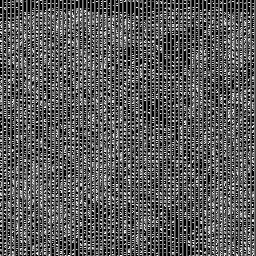

In [16]:
img_array = output[0, 0, :, :]
img_array = torch.clip(img_array, 0, 255)

img_array = img_array[0 : inputs.shape[2], 0 : inputs.shape[3]]
Image.fromarray(img_array.cpu().numpy(), mode="L")

In [17]:
img_array

tensor([[255.0000, 255.0000, 255.0000,  ..., 254.5414, 255.0000, 252.7088],
        [255.0000, 253.6292, 253.4073,  ..., 255.0000, 255.0000, 255.0000],
        [255.0000, 253.2531, 255.0000,  ..., 255.0000, 255.0000, 255.0000],
        ...,
        [255.0000, 255.0000, 255.0000,  ..., 241.6971, 246.9355, 251.0005],
        [255.0000, 254.8328, 255.0000,  ..., 255.0000, 255.0000, 250.9866],
        [252.7328, 255.0000, 255.0000,  ..., 251.3828, 255.0000, 234.5072]])

In [18]:
with torch.no_grad():
    output_hf = model(inputs).pixel_values
output_hf

tensor([[255.0000, 255.0000, 255.0000,  ..., 254.5414, 255.0000, 252.7088],
        [255.0000, 253.6292, 253.4073,  ..., 255.0000, 255.0000, 255.0000],
        [255.0000, 253.2531, 255.0000,  ..., 255.0000, 255.0000, 255.0000],
        ...,
        [255.0000, 255.0000, 255.0000,  ..., 241.6971, 246.9355, 251.0005],
        [255.0000, 254.8328, 255.0000,  ..., 255.0000, 255.0000, 250.9866],
        [252.7328, 255.0000, 255.0000,  ..., 251.3828, 255.0000, 234.5072]])

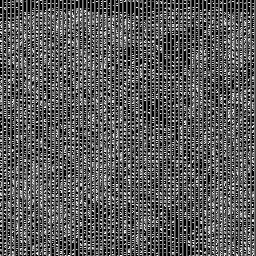

In [19]:
Image.fromarray(output_hf.cpu().numpy(), mode="L")

In [20]:
img_array == output_hf

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

## Push to hub


In [22]:
model.to(torch.bfloat16)  # optional

MLEForAnimeLineExtraction(
  (model): MLEModel(
    (encoder): MLEEncoder(
      (layers): ModuleList(
        (0): MLEEncoderLayer(
          (blocks): ModuleList(
            (0): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(1, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (norm2): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
                (act_fn): LeakyReLU(negative_slope=0.2)
              )
              (conv2): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (resize): Conv2d(1, 24, kernel_size=(1, 1), stride=(1, 1))
            )
            (1): MLEResBlock(
              (norm1): MLEBatchNorm(
                (norm): BatchNorm2d(24, eps=0.001

In [ ]:
model.push_to_hub(YOUR_REPO_NAME)